In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/portu_banking_final.csv')
dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
dataset.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [ ]:
list(set(dataset.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [ ]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [ ]:
dataset['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

**No the classes are not balanced inside 'y' column**

In [ ]:
dataset.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
# check missing values
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
dataset['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

Use replace funtion

In [ ]:

dataset['marital'] = dataset['marital'].replace({"M":'married',"D":"divorced", "S":"single", "unknown":'married'})

In [ ]:
dataset['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
dataset['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [ ]:
dataset['education'] = dataset['education'].replace({"basic.9y":"basic-9y", "basic.4y":"basic-4y", "basic.6y":"basic-6y", "unknown":'university.degree'})

In [ ]:
dataset['education'].unique()

array(['basic-4y', 'university.degree', 'high.school', 'basic-9y',
       'professional.course', 'basic-6y', 'illiterate'], dtype=object)

In [ ]:
dataset['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [ ]:
dataset['default'] = dataset['default'].replace({"0":"no"})

In [ ]:
dataset['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [ ]:
dataset['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
dataset['housing'] = dataset['housing'].replace({"unknown":"yes"})

In [ ]:
dataset['housing'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dataset['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
dataset['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [ ]:
dataset['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
dataset['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
dataset['duration'].unique()

array([ 210,  138,  339, ..., 2260, 1662, 1490])

In [ ]:
#Use the groupby function on the mean of y:

groub_y = dataset.groupby('y')['y'].count()
print(groub_y )

y
0    36548
1     4640
Name: y, dtype: int64


In [ ]:
#Use the groupby function on the mean of job :

groub_job = dataset.groupby('job')['job'].count()
print(groub_job )

job
ADMIN.               2
BLUE-COLLAR          1
HOUSEMAID            1
MANAGEMENT           1
RETIRED              3
SERVICES             3
STUDENT              2
TECHNICIAN           1
UNKNOWN              1
admin.           10420
blue-collar       9253
entrepreneur      1456
housemaid         1059
management        2923
retired           1717
self-employed     1421
services          3966
student            873
technician        6742
unemployed        1014
unknown            329
Name: job, dtype: int64


In [ ]:
#Use the groupby function on the mean of marital
groub_marital = dataset.groupby('marital')['marital'].count()
print(groub_marital )

marital
divorced     4612
married     25008
single      11568
Name: marital, dtype: int64


In [ ]:
#Use the groupby function on the mean of education
groub_education = dataset.groupby('education')['education'].count()
print(groub_education )

education
basic-4y                4176
basic-6y                2292
basic-9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      13899
Name: education, dtype: int64


In [ ]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


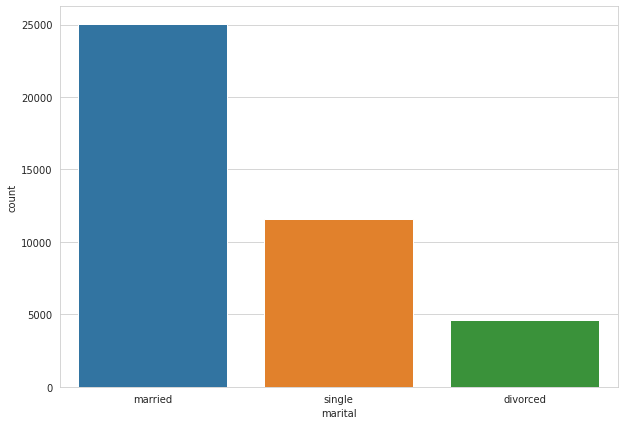

In [ ]:
# Create bar graphs to the frequency of purchase with respect to the job , martial etc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(dataset['marital'])




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


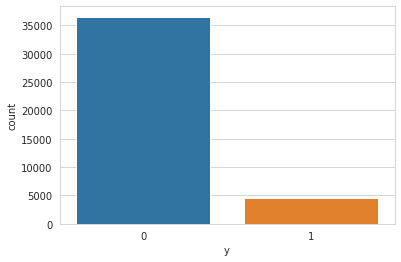

In [ ]:
sns.countplot(dataset['y'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


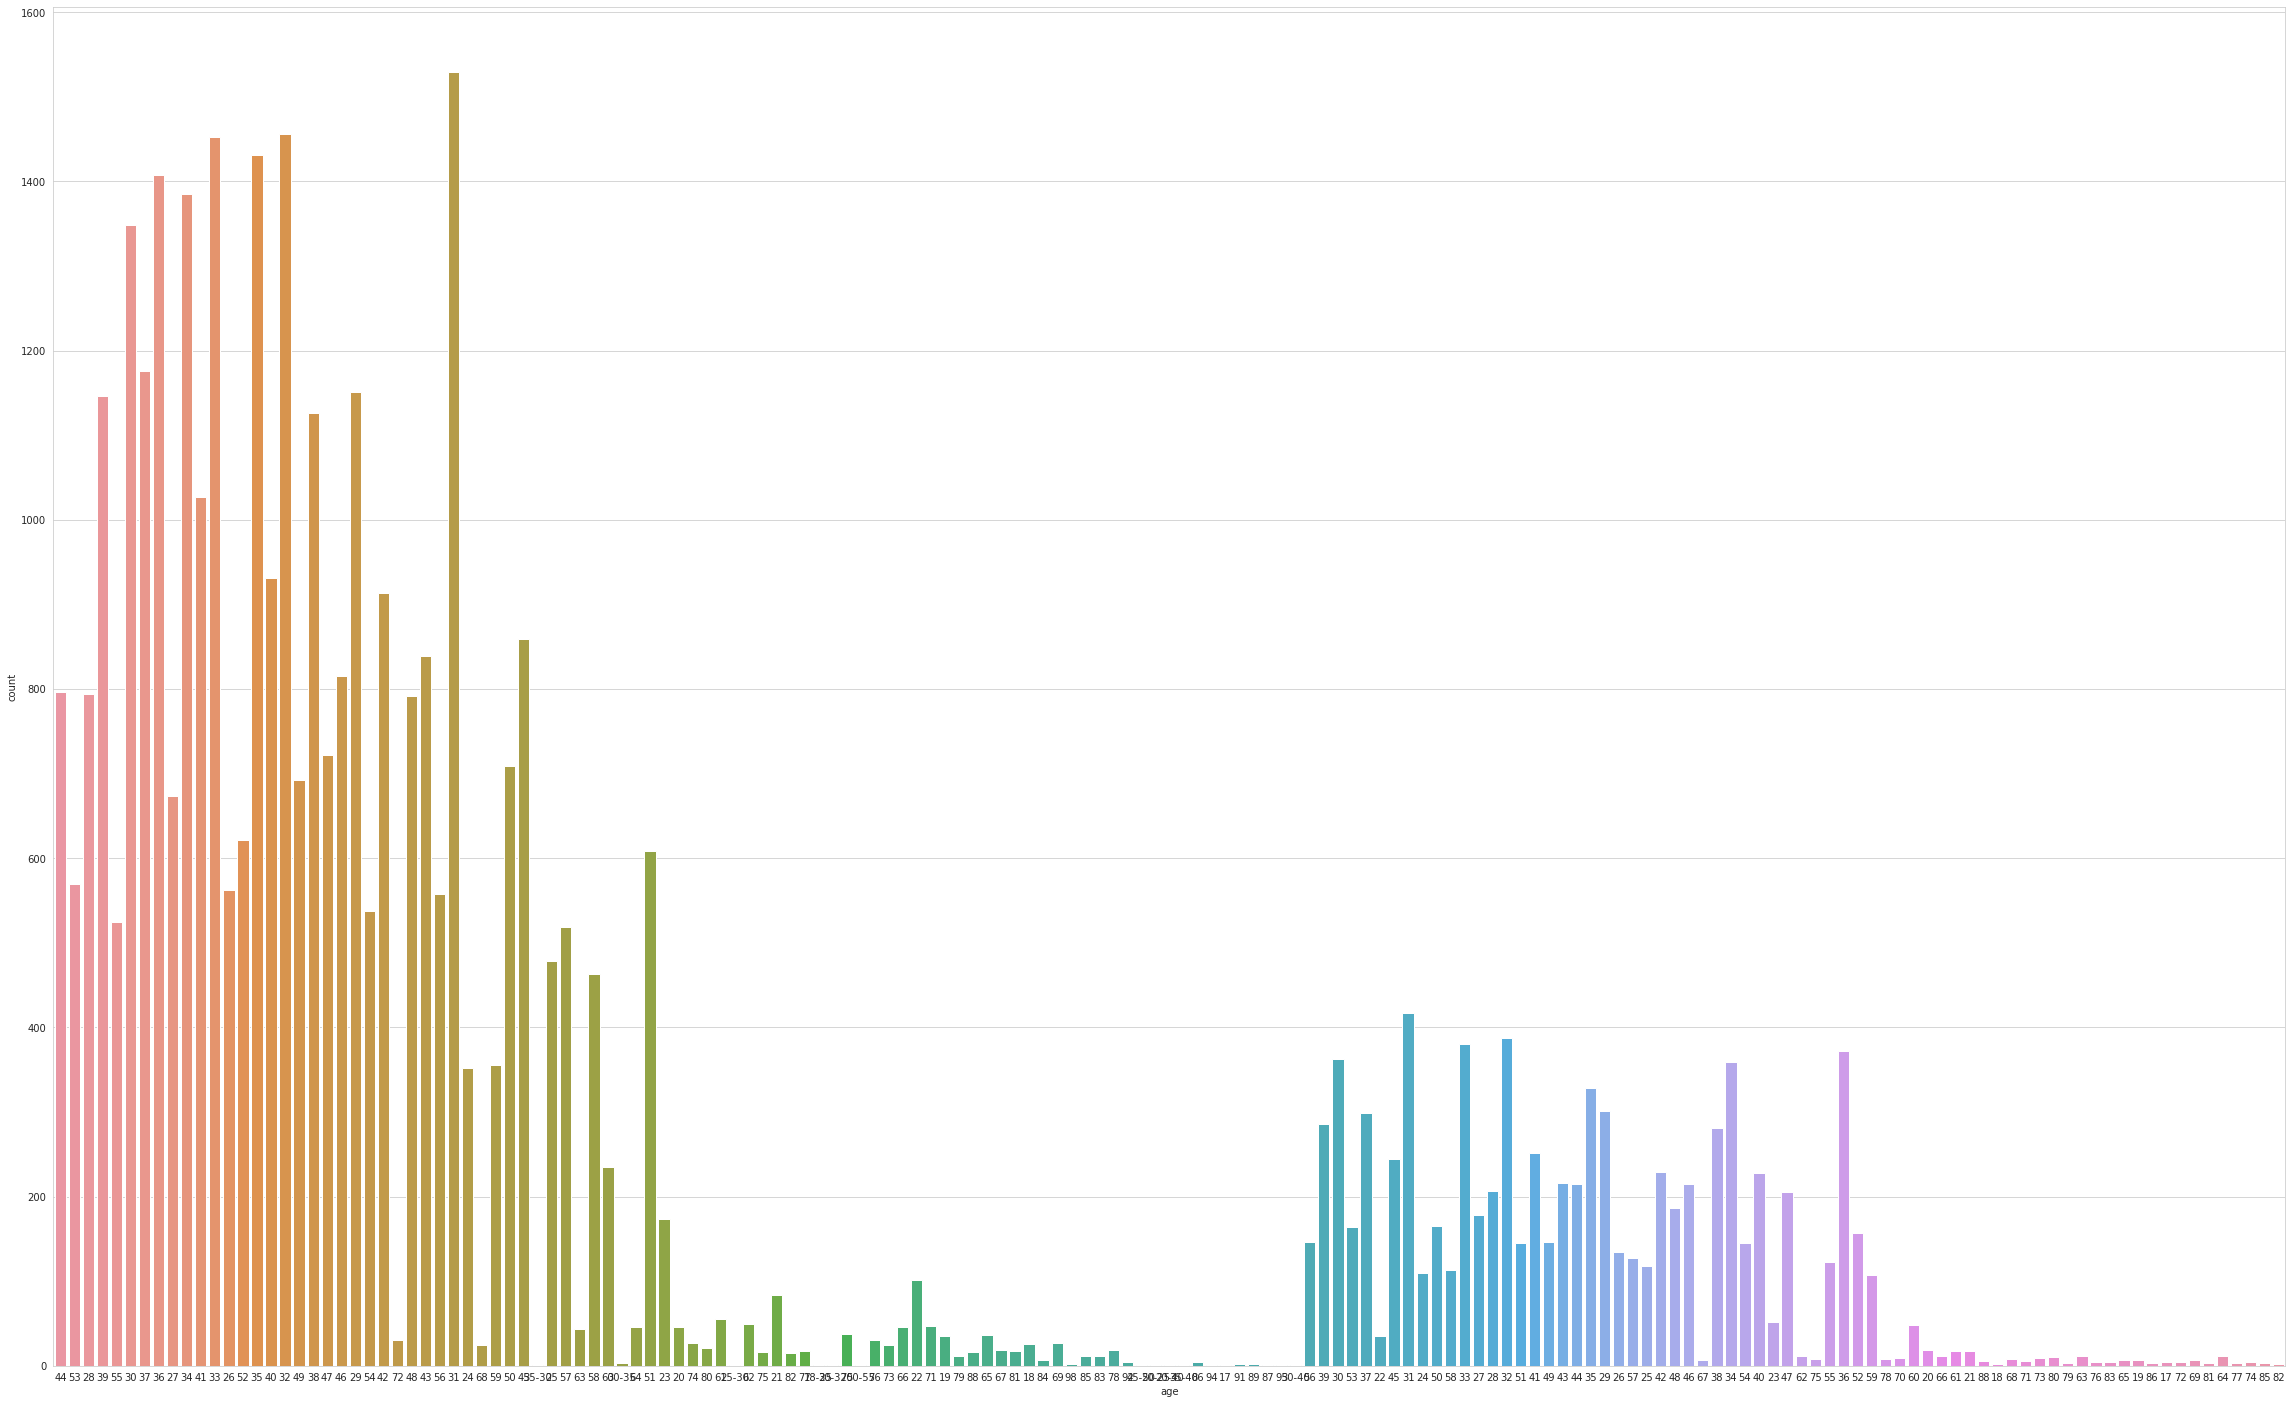

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(40,25))
sns.countplot(dataset['age'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


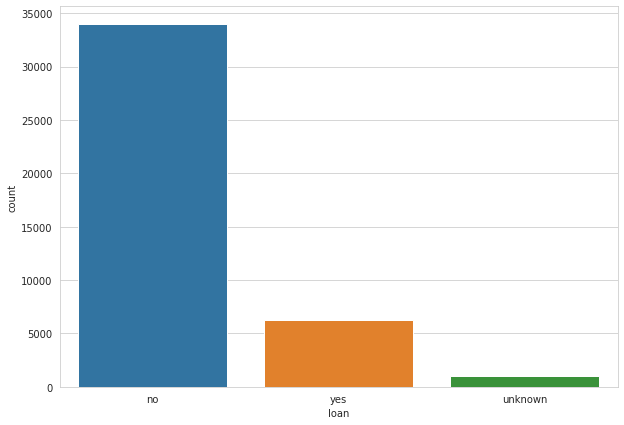

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(dataset['loan'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


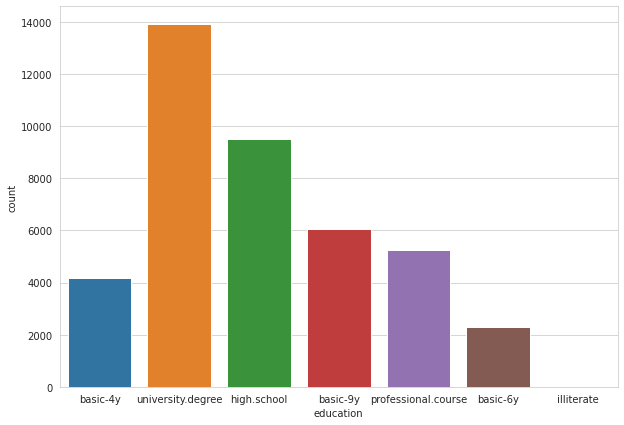

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(dataset['education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


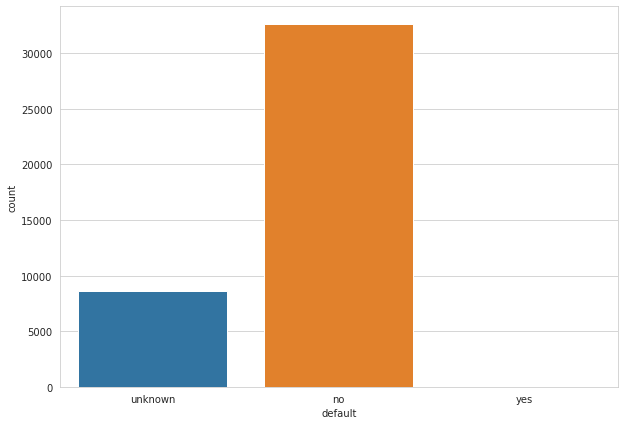

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(dataset['default'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


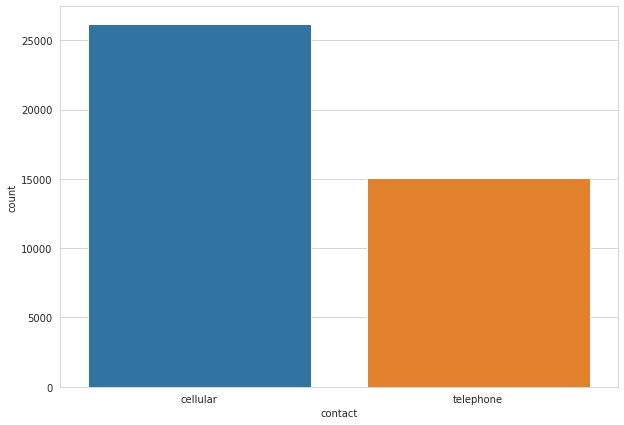

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(dataset['contact'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


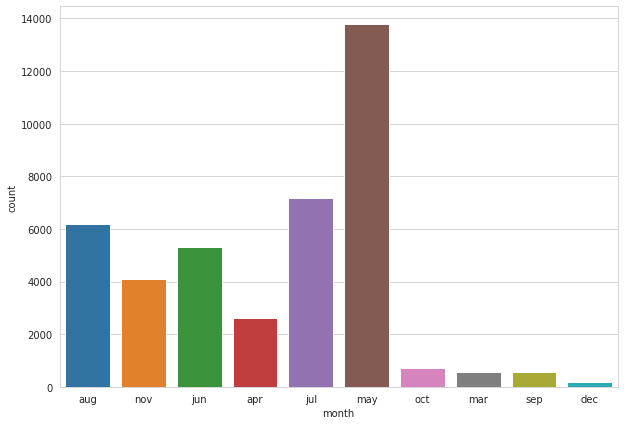

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(dataset['month'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


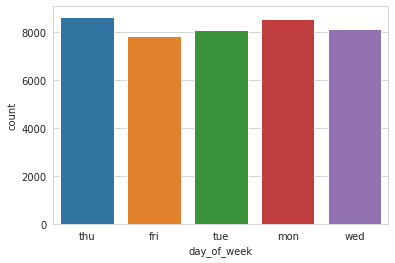

In [ ]:
sns.countplot(dataset['day_of_week'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


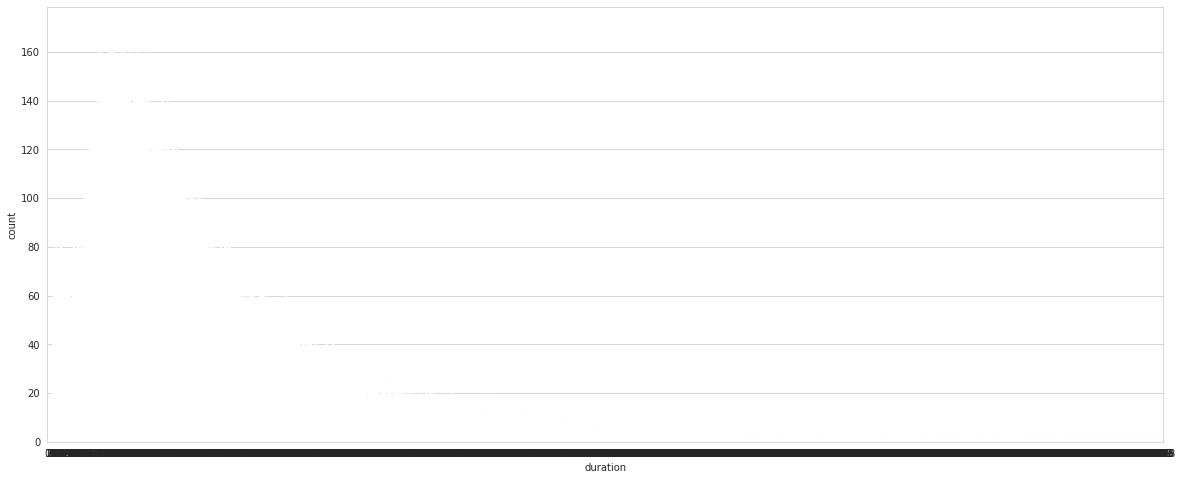

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.countplot(dataset['duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


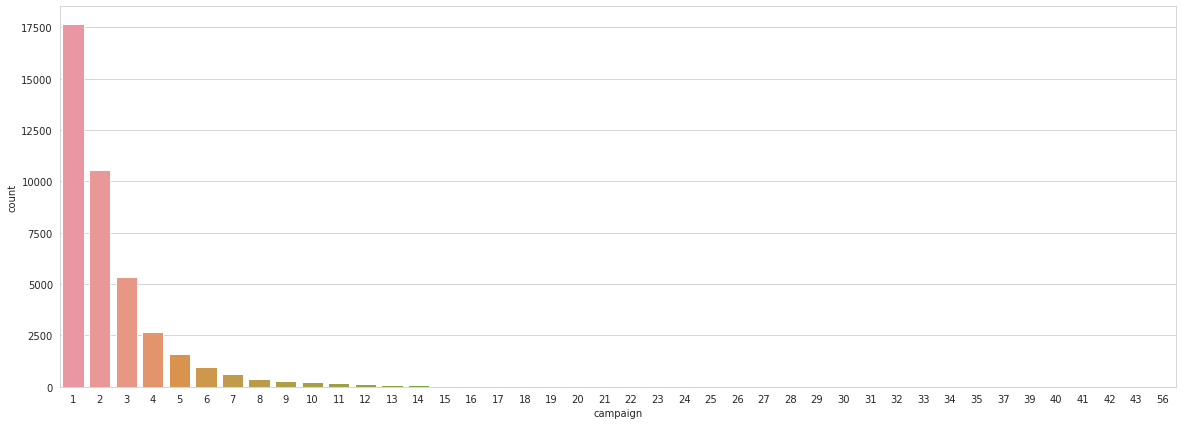

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,7))
sns.countplot(dataset['campaign'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


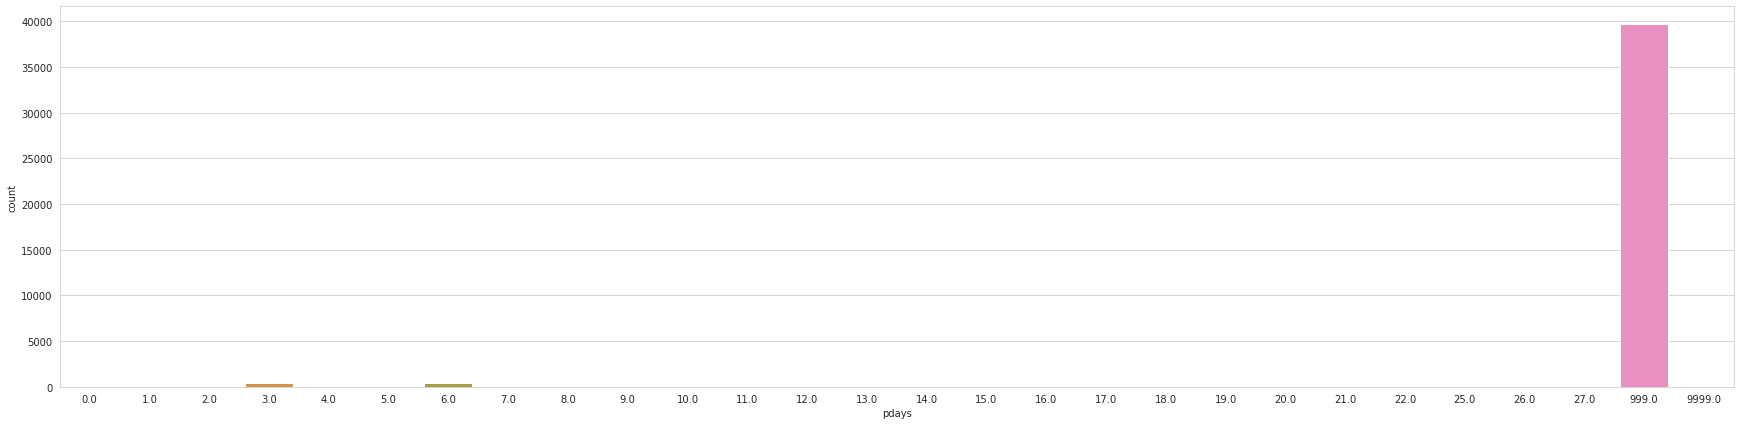

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,7))
sns.countplot(dataset['pdays'])

In [ ]:
dataset['pdays'].value_counts()

999.0     39668
3.0         439
6.0         412
4.0         118
9.0          64
2.0          61
7.0          60
12.0         58
10.0         52
5.0          46
13.0         36
11.0         28
1.0          26
15.0         24
14.0         20
8.0          18
0.0          15
16.0         11
17.0          8
18.0          7
9999.0        5
19.0          3
22.0          3
21.0          2
20.0          1
26.0          1
27.0          1
25.0          1
Name: pdays, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


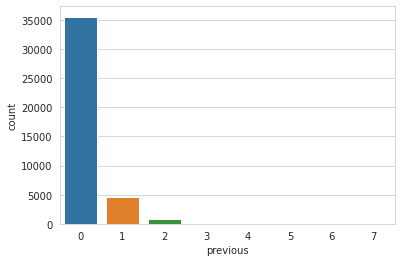

In [ ]:
sns.countplot(dataset['previous'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


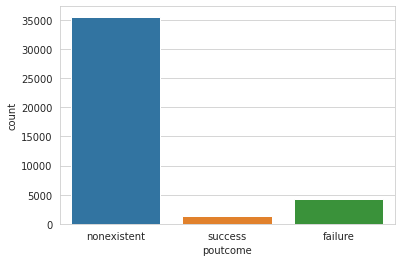

In [ ]:
#poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'
sns.countplot(dataset['poutcome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


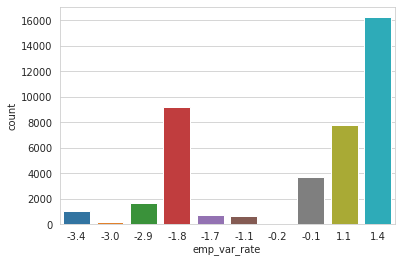

In [ ]:
sns.countplot(dataset['emp_var_rate'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


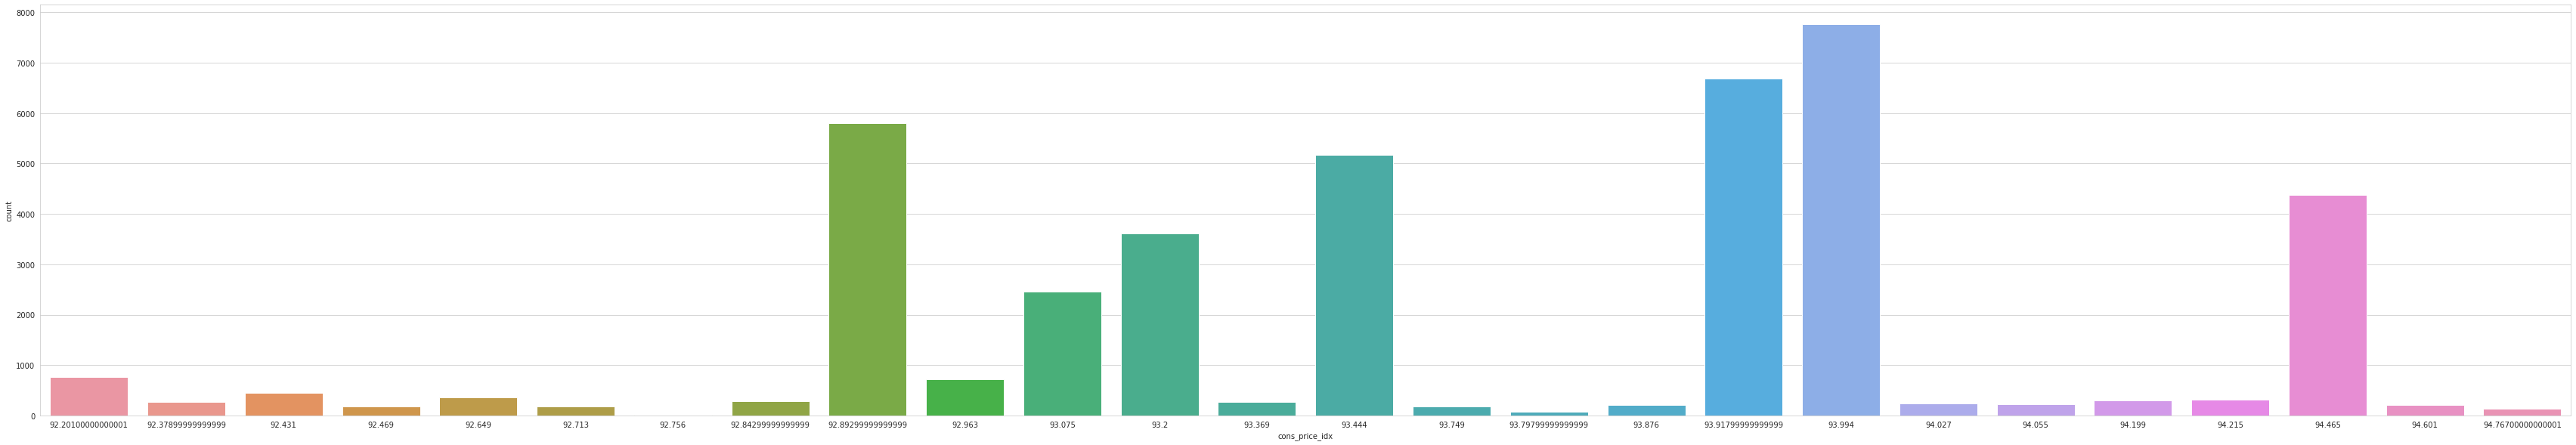

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(60,10))
sns.countplot(dataset['cons_price_idx'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


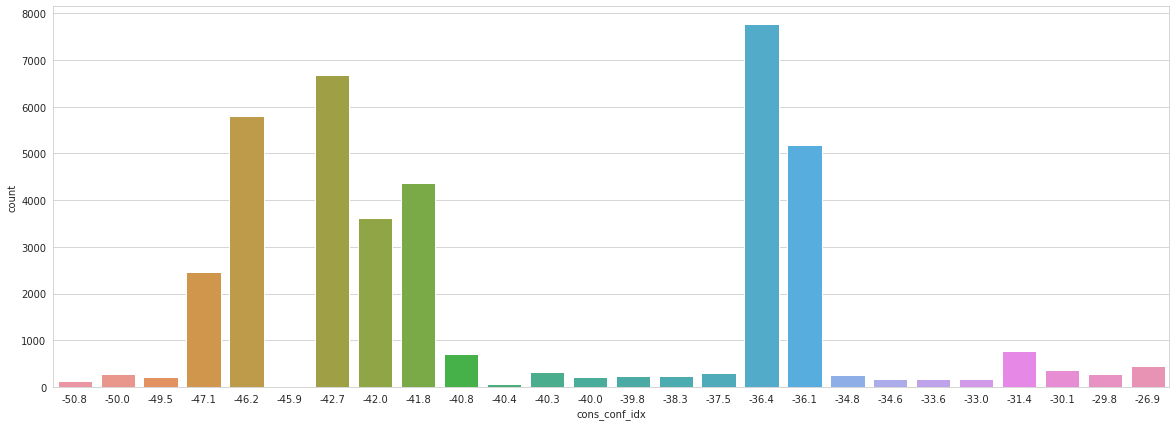

In [ ]:

sns.set_style('whitegrid')
plt.figure(figsize=(20,7))
sns.countplot(dataset['cons_conf_idx'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


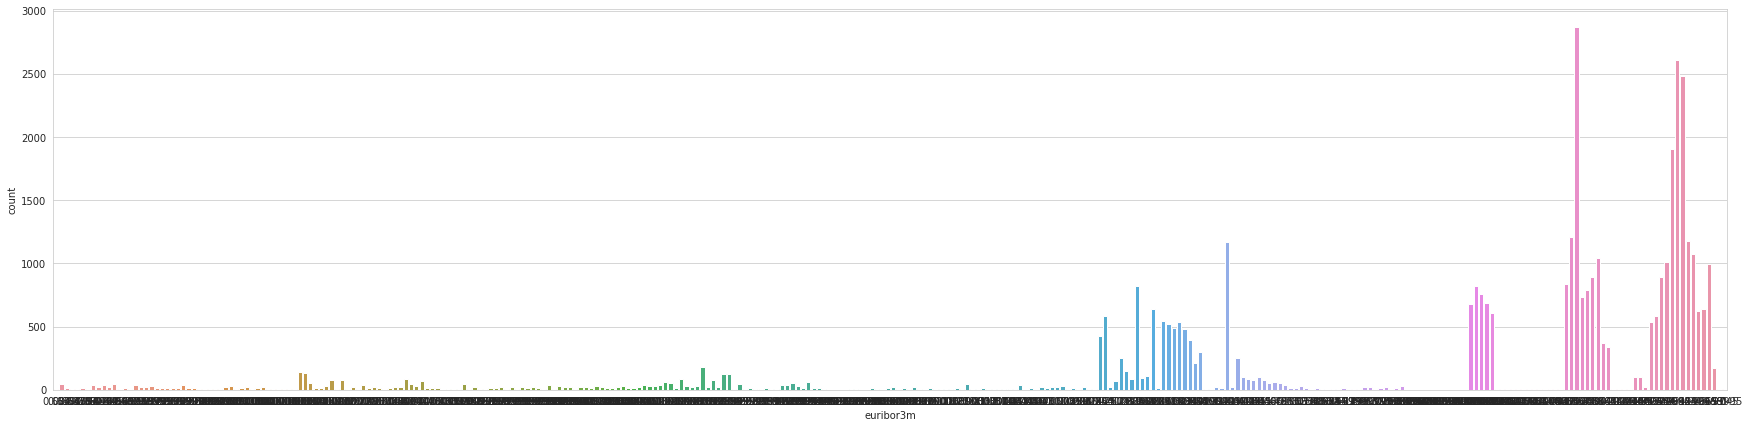

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,7))
sns.countplot(dataset['euribor3m'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


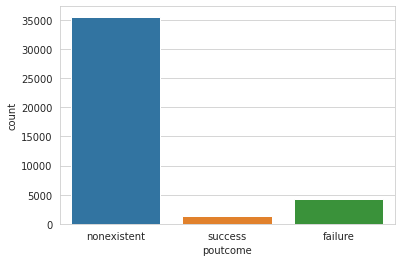

In [ ]:
sns.countplot(dataset['poutcome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


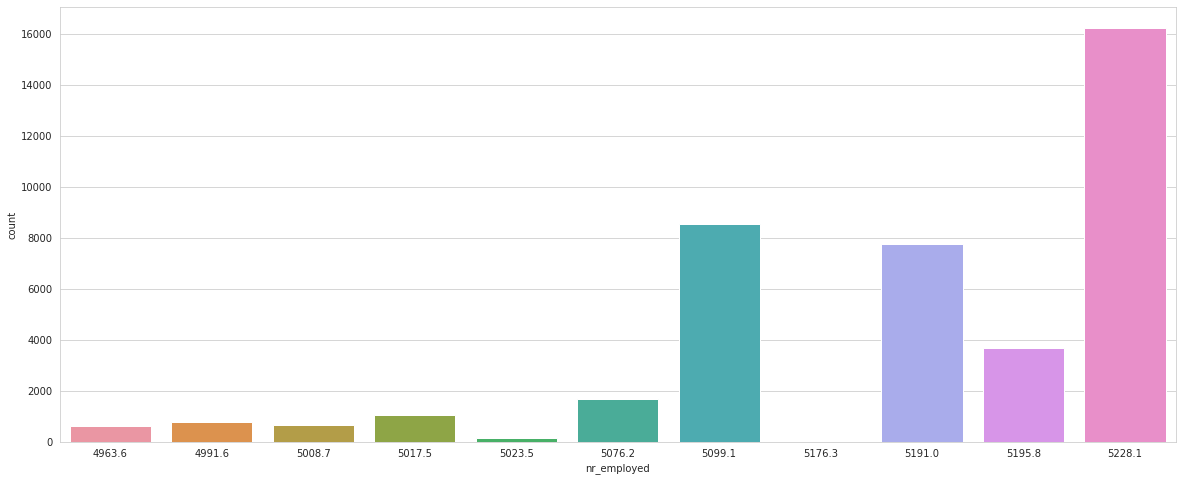

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.countplot(dataset['nr_employed'])

In [ ]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic-4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic-4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
# Part II : Also create stacked bars to same data columns with respect to
dataset['duration'].plot(x='duration', kind='bar', stacked=True,figsize=(16,9),title='Stacked Bar Graph ')

In [ ]:
dataset.age.dtype

dtype('O')

In [ ]:
dataset.age.unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', 33, '25', '57', '63', '58', '60', '64', '51', '23', '20',
       '74', '80', '61', 28, '62', '75', '21', '82', '77', 22, 31, '70',
       50, '76', '73', '66', '22', '71', '19', '79', '88', '65', '67',
       '81', '18', '84', '69', '98', '85', '83', '78', '92', 48, 30, 37,
       '86', '94', '17', '91', '89', '87', '95', 35, 56, 39, 53, 45, 24,
       58, 27, 32, 51, 41, 49, 43, 44, 29, 26, 57, 25, 42, 46, 67, 38, 34,
       54, 40, 23, 47, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61, 21,
       88, 18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81,
       64, 77, 74, 85, 82], dtype=object)

In [ ]:
dataset['age']=dataset['age'].replace('35-30',33)
dataset['age']=dataset['age'].replace('30-35',33)
dataset['age']=dataset['age'].replace('25-30',28)
dataset['age']=dataset['age'].replace('18-25',22)
dataset['age']=dataset['age'].replace('30-32',31)
dataset['age']=dataset['age'].replace('50-55',50)
dataset['age']=dataset['age'].replace('20-25',22)
dataset['age']=dataset['age'].replace('20-40',30)
dataset['age']=dataset['age'].replace('20-25',22)
dataset['age']=dataset['age'].replace('45-50',48)
dataset['age']=dataset['age'].replace('35-40',37)
dataset['age']=dataset['age'].replace('30-40',35)

In [ ]:
dataset.age.astype('int64')

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int64

In [ ]:
dataset['age'].astype('int64')

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int64

In [ ]:
dataset.age.dtypes

dtype('O')

In [ ]:
dataset['age']=pd.to_numeric(dataset['age'])

In [ ]:
dataset.age.dtypes

dtype('int64')

we conver type from **object** to **numeric**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14f6332a10>]],
      dtype=object)

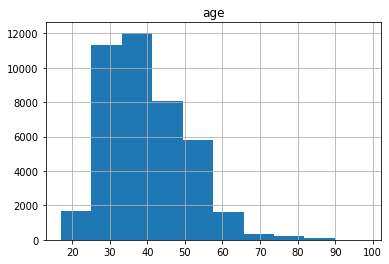

In [ ]:
#Explore the age column using a histogram and note down your observations
dataset.hist(column='age')

In [ ]:
df=dataset.select_dtypes('object')

In [ ]:
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic-4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,university.degree,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic-4y,no,yes,no,cellular,aug,fri,success


In [ ]:
df1=dataset.select_dtypes('int','float')

In [ ]:
df1

,age,duration,campaign,previous,y
0,44,210,1,0,0
1,53,138,1,0,0
2,28,339,3,2,1
3,39,185,2,0,0
4,55,137,1,1,1
...,...,...,...,...,...
41183,59,222,1,0,0
41184,31,196,2,0,0
41185,42,62,3,0,0
41186,48,200,2,0,0


In [ ]:
missing=df1.isna().sum()

In [ ]:
missing

age         0
duration    0
campaign    0
previous    0
y           0
dtype: int64

In [ ]:
pd.get_dummies(df['job']).head()

,ADMIN.,BLUE-COLLAR,HOUSEMAID,MANAGEMENT,RETIRED,SERVICES,STUDENT,TECHNICIAN,UNKNOWN,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
pd.get_dummies(df['marital']).head()

,divorced,married,single
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [ ]:
pd.get_dummies(df['education']).head()

,basic-4y,basic-6y,basic-9y,high.school,illiterate,professional.course,university.degree
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0


In [ ]:
pd.get_dummies(df['default']).head()

,no,unknown,yes
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
pd.get_dummies(df['housing']).head()

,no,yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [ ]:
pd.get_dummies(df['loan']).head()

,no,unknown,yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
pd.get_dummies(df['loan']).head()

,cellular,telephone
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
